### Лабораторная работа 1


In [1]:
from typing import List
import numpy as np

1. Простая нейронная сеть (состоящая из одного нейрона)


In [7]:
weight = 0.1


def neural_network(input, weight):

    prediction = input * weight

    return prediction

In [8]:
number_of_wins = [8.5, 9.5, 10, 9]
input = number_of_wins[0]
pred = neural_network(input, weight)
print(pred)

0.8500000000000001


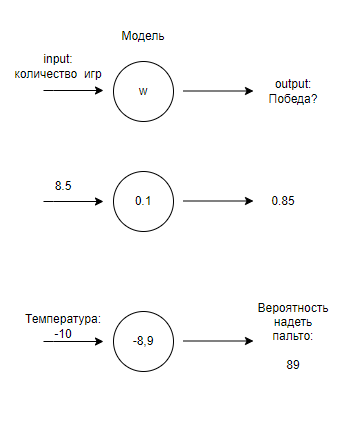


2. Прогнозирование с несколькими входами


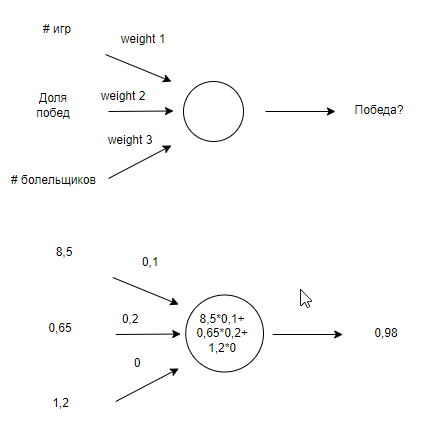


In [ ]:
def w_sum(a, b):
    assert len(a) == len(b)
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output


weights = [0.1, 0.2, 0]


def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred


games = [8.5, 9.5, 9.9, 9.0]  # среднее число игр, сыгранных каждым игроком в сезоне
wins = [0.65, 0.8, 0.8, 0.9]  # доля побед
nfans = [1.2, 1.3, 0.5, 1.0]  # число фанатов в тысячах


input = [games[0], wins[0], nfans[0]]
pred = neural_network(input, weights)

print(pred)

0.9800000000000001


Перепишите код выше с использованием библиотеки numpy, используя встроенные операции с векторами (скалярное произведение)
NumPy Code:


In [46]:
def w_sum(a: np.ndarray, b: np.ndarray) -> float:
    assert a.size == b.size
    assert a.ndim == 1 and b.ndim == 1
    output = a @ b
    return output


def neural_network(input: np.ndarray, weights: np.ndarray) -> float:
    pred = w_sum(input, weights)
    return pred


weights = np.array([0.1, 0.2, 0])
games = [8.5, 9.5, 9.9, 9.0]  # среднее число игр, сыгранных каждым игроком в сезоне
wins = [0.65, 0.8, 0.8, 0.9]  # доля побед
nfans = [1.2, 1.3, 0.5, 1.0]  # число фанатов в тысячах

input = np.array([games[0], wins[0], nfans[0]])
pred = neural_network(input, weights)

print(pred)

0.9800000000000001


In [39]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.sum(a * b))
print(a @ b)
c = np.vstack([a, b])
print(c)
print(c.ndim)

32
32
[[1 2 3]
 [4 5 6]]
2


3. Прогнозирование с несколькими выходами


In [47]:
def ele_mul(number, vector):
    output = [0, 0, 0]
    assert len(output) == len(vector)
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output


weights = [0.3, 0.2, 0.9]


def neural_network(input, weights):
    pred = ele_mul(input, weights)
    return pred


wins = [0.65, 0.8, 0.8, 0.9]
input = wins[0]
pred = neural_network(input, weights)

print(pred)

[0.195, 0.13, 0.5850000000000001]


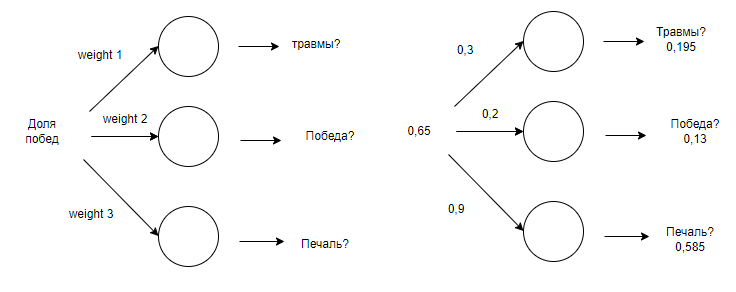


Версия с Numpy:


In [52]:
def ele_mul(number: float, vector: np.ndarray) -> np.ndarray:
    output = number * vector
    return output


def neural_network(input: float, weights: np.ndarray) -> np.ndarray:
    pred = ele_mul(input, weights)
    return pred


weights = np.array([0.3, 0.2, 0.9])
wins = [0.65, 0.8, 0.8, 0.9]
input = wins[0]
pred = neural_network(input, weights)

print(pred)

[0.195 0.13  0.585]


4. Прогнозирование с несколькими входами и выходами


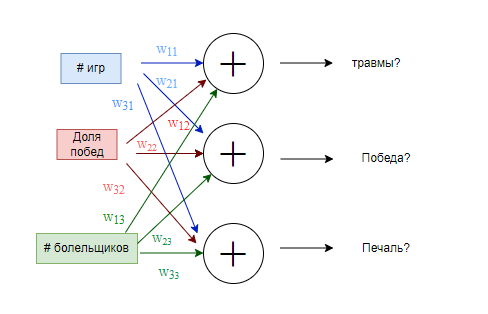


In [55]:
def w_sum(a, b):
    assert len(a) == len(b)
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output


def vect_mat_mul(vect, matrix):
    output = []
    for i in range(len(matrix)):
        res = w_sum(vect, matrix[i])
        output.append(res)
    return output


def neural_network(input, weights):
    pred = vect_mat_mul(input, weights)
    return pred

    # games %wins #fans


weights = [[0.1, 0.1, -0.3], [0.1, 0.2, 0.0], [0.0, 1.3, 0.1]]  # hurt?  # win?  # sad?

games = [8.5, 9.5, 9.9, 9.0]
wins = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = [games[0], wins[0], nfans[0]]
pred = neural_network(input, weights)

print(pred)

[0.555, 0.9800000000000001, 0.9650000000000001]


Версия numpy:


In [58]:
def vect_mat_mul(vect, matrix):
    output = vect @ matrix.T
    return output


def neural_network(input, weights):
    pred = vect_mat_mul(input, weights)
    return pred


# games %wins #fans
weights = np.array(
    [[0.1, 0.1, -0.3], [0.1, 0.2, 0.0], [0.0, 1.3, 0.1]]  # hurt?  # win? # sad?
)

games = [8.5, 9.5, 9.9, 9.0]
wins = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = np.array([games[0], wins[0], nfans[0]])
pred = neural_network(input, weights)

print(pred)

[0.555 0.98  0.965]


5. Нейронная сеть с одним скрытым слоем


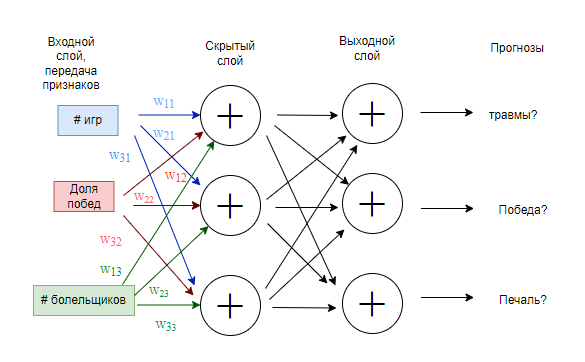


Реализуйте получение прогноза для данной архитектуры с использованием библиотеки Numpy


In [60]:
# games %wins #fans
input_wgt = [
    [0.1, 0.2, -0.1],  # hid[0]
    [-0.1, 0.1, 0.9],  # hid[1]
    [0.1, 0.4, 0.1],
]  # hid[2]

# hid[0] hid[1] hid[2]
hidden_wgt = [
    [0.3, 1.1, -0.3],  # hurt?
    [0.1, 0.2, 0.0],  # win?
    [0.0, 1.3, 0.1],
]  # sad?

input_wgt = np.array(input_wgt)
hidden_wgt = np.array(hidden_wgt)

weights = [input_wgt, hidden_wgt]

games = [8.5, 9.5, 9.9, 9.0]
wins = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = np.array([games[0], wins[0], nfans[0]])

In [61]:
def forward(input: np.ndarray, weights: List[np.ndarray]) -> np.ndarray:
    input_wgt, hidden_wgt = weights
    hidden = input @ input_wgt.T
    output = hidden @ hidden_wgt.T
    return output


output = forward(input, weights)
print(output)

[0.2135 0.145  0.5065]


Вспоминая numpy...


In [ ]:
import numpy as np

a = np.array([0, 1, 2, 3])  # a vector
b = np.array([4, 5, 6, 7])  # another vector
c = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])  # a matrix

d = np.zeros((2, 4))  # (2x4 matrix of zeros)
e = np.random.rand(2, 5)  # random 2x5
# matrix with all numbers between 0 and 1

print(a)
print(b)
print(c)
print(d)
print(e)

[0 1 2 3]
[4 5 6 7]
[[0 1 2 3]
 [4 5 6 7]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.38038541 0.04082367 0.60577875 0.63911228 0.46485785]
 [0.63807311 0.45549784 0.95017955 0.6437139  0.45557479]]


In [ ]:
print(a * 0.1)  # multiplies every number in vector "a" by 0.1

print(c * 0.2)  # multiplies every number in matrix "c" by 0.2

print(a * b)  # multiplies elementwise between a and b (columns paired up)

print(a * b * 0.2)  # elementwise multiplication then multiplied by 0.2

print(a * c)  # since c has the same number of columns as a, this performs
# elementwise multiplication on every row of the matrix "c"

print(a * e)  # since a and e don't have the same number of columns, this
# throws a "Value Error: operands could not be broadcast together with.."

[0.  0.1 0.2 0.3]
[[0.  0.2 0.4 0.6]
 [0.8 1.  1.2 1.4]]
[ 0  5 12 21]
[0.  1.  2.4 4.2]
[[ 0  1  4  9]
 [ 0  5 12 21]]


ValueError: ignored

In [ ]:
a = np.zeros((1, 4))  # vector of length 4
b = np.zeros((4, 3))  # matrix with 4 rows & 3 columns

c = a.dot(b)
print(c.shape)

(1, 3)


In [ ]:
a = np.zeros((2, 4))  # matrix with 2 rows and 4 columns
b = np.zeros((4, 3))  # matrix with 4 rows & 3 columns

c = a.dot(b)
print(c.shape)  # outputs (2,3)

e = np.zeros((2, 1))  # matrix with 2 rows and 1 columns
f = np.zeros((1, 3))  # matrix with 1 row & 3 columns

g = e.dot(f)
print(g.shape)  # outputs (2,3)

h = np.zeros((5, 4)).T  # matrix with 4 rows and 5 columns
i = np.zeros((5, 6))  # matrix with 6 rows & 5 columns

j = h.dot(i)
print(j.shape)  # outputs (4,6)

h = np.zeros((5, 4))  # matrix with 5 rows and 4 columns
i = np.zeros((5, 6))  # matrix with 5 rows & 6 columns
j = h.dot(i)
print(j.shape)  # throws an error

(2, 3)
(2, 3)
(4, 6)


ValueError: ignored

In [27]:
a = np.array([[1, 2], [3, 4]])  # 2 x 2
b = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # 2 x 2 x 2
b = b.reshape(2, 2, 2)
print(a, end="\n\n")
print(b, end="\n\n")
print(a * b)

[[1 2]
 [3 4]]

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

[[[ 1  4]
  [ 9 16]]

 [[ 5 12]
  [21 32]]]
